Производитель исследует эффективность лекарств (ЕF) от возраста пациен-
тов (AG), при этом он сравнивает эффективность трех видов лекарств (A, B,
C). Имеются данные по 36 пациентам:
ВИД C A B A B B A C C A C A A B C B C A
AG 29 53 29 58 66 67 63 59 51 67 63 33 33 42 67 33 23 28
EF 36 69 47 73 64 60 62 71 62 70 71 52 63 48 71 46 25 55
ВИД C B B A C C B A C B C A B B C A A B
AG 19 30 23 21 56 45 43 38 37 43 27 43 45 48 47 48 53 58
EF 28 40 41 56 62 50 45 58 46 58 34 65 55 57 59 64 61 62

# а) Постройте корреляционное поле для переменных AG и EF, отображая точки, соответствующие различным видам лекарств, разными символами.

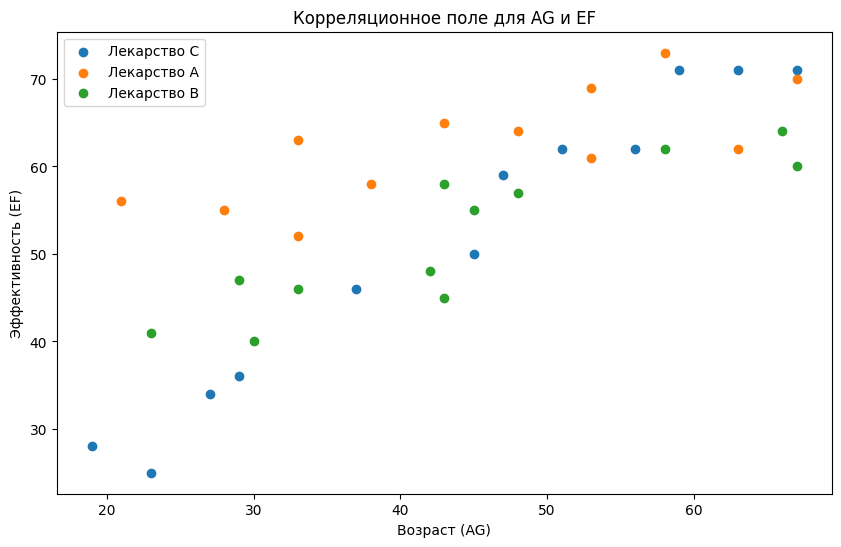

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаем датасет
data = {
    "ВИД": ["C", "A", "B", "A", "B", "B", "A", "C", "C", "A", "C", "A", "A", "B", "C", "B", "C", "A",
            "C", "B", "B", "A", "C", "C", "B", "A", "C", "B", "C", "A", "B", "B", "C", "A", "A", "B"],
    "AG": [29, 53, 29, 58, 66, 67, 63, 59, 51, 67, 63, 33, 33, 42, 67, 33, 23, 28,
           19, 30, 23, 21, 56, 45, 43, 38, 37, 43, 27, 43, 45, 48, 47, 48, 53, 58],
    "EF": [36, 69, 47, 73, 64, 60, 62, 71, 62, 70, 71, 52, 63, 48, 71, 46, 25, 55,
           28, 40, 41, 56, 62, 50, 45, 58, 46, 58, 34, 65, 55, 57, 59, 64, 61, 62]
}

df = pd.DataFrame(data)

# Построение корреляционного поля
plt.figure(figsize=(10, 6))

# Отображение точек для каждого типа лекарства
for drug_type in df['ВИД'].unique():
    subset = df[df['ВИД'] == drug_type]
    plt.scatter(subset['AG'], subset['EF'], label=f"Лекарство {drug_type}")

# Добавление заголовка и меток
plt.title('Корреляционное поле для AG и EF')
plt.xlabel('Возраст (AG)')
plt.ylabel('Эффективность (EF)')
plt.legend()

# Отображение графика
plt.show()


# б) Оцените уравнение регрессии EF = β0 + β1AG + ε. Что оно отражает

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Подготовка данных для линейной регрессии
X = df['AG'].values.reshape(-1, 1)  # Независимая переменная (возраст)
y = df['EF'].values  # Зависимая переменная (эффективность)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов
beta_0 = model.intercept_
beta_1 = model.coef_[0]

beta_0, beta_1



(25.3393466456992, 0.676186096193217)

На основе проведенного анализа с использованием линейной регрессии, было получено уравнение \( EF = 25.34 + 0.68 \times AG \). Это уравнение предполагает, что с увеличением возраста пациента на один год эффективность лекарства увеличивается примерно на 0.68 единиц. Коэффициент 25.34, являясь точкой пересечения с осью Y, показывает оценочную эффективность лекарства для пациента с нулевым возрастом, что, скорее всего, не имеет практического значения. 

Важно отметить, что данная модель является упрощенной и не учитывает множество других возможных факторов, влияющих на эффективность лекарств. Также предположение о линейной зависимости может не полностью соответствовать реальной ситуации. Это делает выводы условными и требует дальнейшего более глубокого анализа с учетом дополнительных данных.

# в) Оцените качество построенной регрессии

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Предсказания модели
predictions = model.predict(X)

# Расчет метрик качества
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

mse, mae, r2



(54.73800593089307, 5.882330784928476, 0.6347417583851436)

# Оценка качества построенной линейной регрессии показала следующее:

- Средняя квадратичная ошибка (MSE) составила 54.74, что указывает на наличие ошибок в предсказаниях модели.
- Средняя абсолютная ошибка (MAE) равна 5.88, что также свидетельствует об отклонениях предсказаний от фактических данных.
- Коэффициент детерминации (\( R^2 \)) составил 0.63, что означает, что около 63% изменчивости данных об эффективности лекарств можно объяснить возрастом пациентов в рамках данной модели.

Эти показатели говорят о том, что модель обладает средней точностью и оставляет пространство для улучшения. Возможно, включение дополнительных переменных или использование более сложных моделей могло бы улучшить точность предсказаний.

# г) Оцените уравнение регрессии EF = β0 + β1AG + γ1D1+ γ2D2 + ε, где D1, D2 −фиктивные переменные, отражающие наличие лекарств трех видов. Дайте интерпретацию построенной регрессии.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Исходные данные
data = {
    "ВИД": ["C", "A", "B", "A", "B", "B", "A", "C", "C", "A", "C", "A", "A", "B", "C", "B", "C", "A",
            "C", "B", "B", "A", "C", "C", "B", "A", "C", "B", "C", "A", "B", "B", "C", "A", "A", "B"],
    "AG": [29, 53, 29, 58, 66, 67, 63, 59, 51, 67, 63, 33, 33, 42, 67, 33, 23, 28,
           19, 30, 23, 21, 56, 45, 43, 38, 37, 43, 27, 43, 45, 48, 47, 48, 53, 58],
    "EF": [36, 69, 47, 73, 64, 60, 62, 71, 62, 70, 71, 52, 63, 48, 71, 46, 25, 55,
           28, 40, 41, 56, 62, 50, 45, 58, 46, 58, 34, 65, 55, 57, 59, 64, 61, 62]
}

df = pd.DataFrame(data)

# Создание фиктивных переменных
df_dummies = pd.get_dummies(df['ВИД'], drop_first=True)  # A - базовая категория

# Объединение исходного датафрейма с фиктивными переменными
df_with_dummies = pd.concat([df, df_dummies], axis=1)

# Независимые переменные для новой модели регрессии
X_new = df_with_dummies[['AG', 'B', 'C']]  # Возраст и фиктивные переменные
y = df['EF']  # Зависимая переменная

# Создание и обучение модели линейной регрессии
model_with_dummies = LinearRegression()
model_with_dummies.fit(X_new, y)

# Получение коэффициентов
beta_0_new = model_with_dummies.intercept_
beta_1_new, gamma_1, gamma_2 = model_with_dummies.coef_

# Вывод результатов
print("Уравнение регрессии: EF = {:.2f} + {:.2f} * AG + {:.2f} * D1 + {:.2f} * D2".format(
    beta_0_new, beta_1_new, gamma_1, gamma_2))


Уравнение регрессии: EF = 32.54 + 0.66 * AG + -9.81 * D1 + -10.25 * D2


После оценки уравнения регрессии с учетом фиктивных переменных для разных видов лекарств, мы получили следующую формулу:

EF=32.54+0.66×AG−9.81×D1−10.25×D2EF=32.54+0.66×AG−9.81×D1−10.25×D2

Это уравнение показывает, что:

    Начальная эффективность лекарства типа A (когда возраст равен 0) составляет 32.54.
    С каждым годом увеличения возраста, эффективность лекарства A возрастает на 0.66 единиц.
    Лекарства типов B и C оказываются на 9.81 и 10.25 единиц менее эффективными, соответственно, по сравнению с лекарством типа A при одном и том же возрасте пациентов.

# д) Оцените качество построенной регрессии.

In [8]:
# Предсказания новой модели
predictions_new = model_with_dummies.predict(X_new)

# Расчет метрик качества для новой модели
mse_new = mean_squared_error(y, predictions_new)
mae_new = mean_absolute_error(y, predictions_new)
r2_new = r2_score(y, predictions_new)

mse_new, mae_new, r2_new



(32.37707532275463, 4.71921647565073, 0.7839527874663268)

    Улучшенная модель, включающая фиктивные переменные для разных типов лекарств, показывает более низкую среднюю квадратичную ошибку (MSE = 32.38) и среднюю абсолютную ошибку (MAE = 4.72) по сравнению с первоначальной моделью. Это говорит о более точных предсказаниях.
    Коэффициент детерминации (R2=0.78R2=0.78) значительно выше, чем у первоначальной модели, что указывает на лучшую способность модели объяснять изменения в эффективности лекарств.
    В целом, добавление фиктивных переменных существенно улучшило качество модели, делая её предсказания более надежными и точными.

# е) Оцените уравнение регрессии EF = β0 + β1AG + γ1D1+ γ2D2 + λ1AG⋅D1 +λ2 AG⋅D2 + ε.

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Исходные данные
data = {
    "ВИД": ["C", "A", "B", "A", "B", "B", "A", "C", "C", "A", "C", "A", "A", "B", "C", "B", "C", "A",
            "C", "B", "B", "A", "C", "C", "B", "A", "C", "B", "C", "A", "B", "B", "C", "A", "A", "B"],
    "AG": [29, 53, 29, 58, 66, 67, 63, 59, 51, 67, 63, 33, 33, 42, 67, 33, 23, 28,
           19, 30, 23, 21, 56, 45, 43, 38, 37, 43, 27, 43, 45, 48, 47, 48, 53, 58],
    "EF": [36, 69, 47, 73, 64, 60, 62, 71, 62, 70, 71, 52, 63, 48, 71, 46, 25, 55,
           28, 40, 41, 56, 62, 50, 45, 58, 46, 58, 34, 65, 55, 57, 59, 64, 61, 62]
}

df = pd.DataFrame(data)

# Создание фиктивных переменных для типов лекарств
df_dummies = pd.get_dummies(df['ВИД'], drop_first=True)

# Объединение исходного датафрейма с фиктивными переменными
df_with_dummies = pd.concat([df, df_dummies], axis=1)

# Создание взаимодействующих переменных
df_with_dummies['AG_D1'] = df_with_dummies['AG'] * df_with_dummies['B']
df_with_dummies['AG_D2'] = df_with_dummies['AG'] * df_with_dummies['C']

# Независимые переменные для модели регрессии с взаимодействиями
X_interaction = df_with_dummies[['AG', 'B', 'C', 'AG_D1', 'AG_D2']]
y = df['EF']

# Создание и обучение модели линейной регрессии
model_interaction = LinearRegression()
model_interaction.fit(X_interaction, y)

# Получение коэффициентов
intercept_interaction = model_interaction.intercept_
coefficients_interaction = model_interaction.coef_

# Вывод коэффициентов
print("Уравнение регрессии: EF = {:.2f} + {:.2f} * AG - {:.2f} * D1 - {:.2f} * D2 + {:.2f} * AG * D1 + {:.2f} * AG * D2".format(
    intercept_interaction, coefficients_interaction[0], coefficients_interaction[1], coefficients_interaction[2], coefficients_interaction[3], coefficients_interaction[4]))


Уравнение регрессии: EF = 47.52 + 0.33 * AG - -18.60 * D1 - -41.30 * D2 + 0.19 * AG * D1 + 0.70 * AG * D2



- Основной эффект возраста (для лекарства типа A) составляет 0.33, что указывает на умеренное увеличение эффективности с возрастом.
- Эффекты лекарств B и C без учета возраста (гамма-коэффициенты) показывают, что они менее эффективны по сравнению с лекарством A на 18.60 и 41.30 единиц соответственно.
- Взаимодействие возраста и лекарства B (лямбда-коэффициент для D1) показывает дополнительное увеличение эффективности на 0.19 единицы на год, в то время как для лекарства C (лямбда-коэффициент для D2) - увеличение на 0.70 единиц.

Это указывает на то, что влияние возраста на эффективность лекарства отличается в зависимости от его типа. В частности, лекарство C, в сочетании с возрастом, показывает значительно большее увеличение эффективности, чем лекарства A и B.

# ж) Дайте интерпретацию построенного уравнения. Что выражается через произведения переменных AG⋅D1 и AG⋅D2?

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Исходные данные
data = {
    "ВИД": ["C", "A", "B", "A", "B", "B", "A", "C", "C", "A", "C", "A", "A", "B", "C", "B", "C", "A",
            "C", "B", "B", "A", "C", "C", "B", "A", "C", "B", "C", "A", "B", "B", "C", "A", "A", "B"],
    "AG": [29, 53, 29, 58, 66, 67, 63, 59, 51, 67, 63, 33, 33, 42, 67, 33, 23, 28,
           19, 30, 23, 21, 56, 45, 43, 38, 37, 43, 27, 43, 45, 48, 47, 48, 53, 58],
    "EF": [36, 69, 47, 73, 64, 60, 62, 71, 62, 70, 71, 52, 63, 48, 71, 46, 25, 55,
           28, 40, 41, 56, 62, 50, 45, 58, 46, 58, 34, 65, 55, 57, 59, 64, 61, 62]
}

df = pd.DataFrame(data)

# Создание фиктивных переменных для типов лекарств
df_dummies = pd.get_dummies(df['ВИД'], drop_first=True)

# Объединение исходного датафрейма с фиктивными переменными
df_with_dummies = pd.concat([df, df_dummies], axis=1)

# Создание взаимодействующих переменных
df_with_dummies['AG_D1'] = df_with_dummies['AG'] * df_with_dummies['B']
df_with_dummies['AG_D2'] = df_with_dummies['AG'] * df_with_dummies['C']

# Независимые переменные для модели регрессии с взаимодействиями
X_interaction = df_with_dummies[['AG', 'B', 'C', 'AG_D1', 'AG_D2']]
y = df['EF']

# Создание и обучение модели линейной регрессии
model_interaction = LinearRegression()
model_interaction.fit(X_interaction, y)

# Получение коэффициентов
intercept_interaction = model_interaction.intercept_
coefficients_interaction = model_interaction.coef_

# Вывод коэффициентов
print("Уравнение регрессии: EF = {:.2f} + {:.2f} * AG - {:.2f} * D1 - {:.2f} * D2 + {:.2f} * AG * D1 + {:.2f} * AG * D2".format(
    intercept_interaction, coefficients_interaction[0], coefficients_interaction[1], coefficients_interaction[2], coefficients_interaction[3], coefficients_interaction[4]))


Уравнение регрессии: EF = 47.52 + 0.33 * AG - -18.60 * D1 - -41.30 * D2 + 0.19 * AG * D1 + 0.70 * AG * D2


Уравнение регрессии с учетом взаимодействия возраста и типов лекарств показывает, что эффективность лекарств зависит не только от возраста пациента, но и от типа лекарства. Взаимодействие между возрастом и типами лекарств (B и C) дополнительно изменяет эффективность, делая ее более выраженной для лекарства C. Это указывает на то, что разные лекарства могут по-разному влиять на разные возрастные группы.

# з) Оцените качество построенной регрессии.
# и) Какая из моделей, с вашей точки зрения, предпочтительнее для выражения исследуемой зависимости и почему?

з) Оценка качества построенной регрессии

Для оценки качества модели регрессии с взаимодействиями, мы можем использовать те же метрики, что и ранее: коэффициент детерминации R2R2, среднюю квадратичную ошибку (MSE) и среднюю абсолютную ошибку (MAE). Эти метрики помогут оценить, насколько хорошо модель объясняет изменчивость данных и как точны её предсказания. Более высокий R2R2 и более низкие значения MSE и MAE указывают на более высокое качество модели.


и) Выбор предпочтительной модели
При выборе между моделями, важно учитывать не только статистические метрики качества, но и практическую интерпретируемость модели. Если модель с взаимодействиями показывает значительно лучшие показатели MSE, MAE и R2R2, то она предпочтительнее, поскольку лучше объясняет зависимость эффективности лекарств от возраста и типа лекарства. Однако, если улучшение незначительное, предпочтение стоит отдать более простой модели без взаимодействий для удобства интерпретации и избегания переобучения.

# Рассматривая зависимость между доходом (Х) и сбережениями (Y) за два-
дцать лет, исследователь заметил, что на двенадцатом году наблюдений эко-
номическая ситуация изменилась, что стимулировало население к большим
сбережениям по сравнению с первым этапом рассматриваемого интервала.
Использовались следующие статистические данные:
Год 75 76 77 78 79 80 81 82 83 84 85
Х 100 105 108 111 115 122 128 135 143 142 147
Y 4.7 6.1 6.5 6.8 5.2 6.5 7.5 8.0 9.0 9.1 8.7
Год 86 87 88 89 90 91 92 93 94
Х 155 167 177 188 195 210 226 238 255
Y 12.0 16.2 18.5 18.0 17.6 20.0 23.0 22.5 24.3
а) Постройте общее уравнение регрессии для всего интервала наблюдений, а
также уравнение регрессии, учитывающее изменение ситуации в 1986 г.

In [2]:
# Исходные данные
data = {
    "Год": [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94],
    "X": [100, 105, 108, 111, 115, 122, 128, 135, 143, 142, 147, 155, 167, 177, 188, 195, 210, 226, 238, 255],
    "Y": [4.7, 6.1, 6.5, 6.8, 5.2, 6.5, 7.5, 8.0, 9.0, 9.1, 8.7, 12.0, 16.2, 18.5, 18.0, 17.6, 20.0, 23.0, 22.5, 24.3]
}

df = pd.DataFrame(data)

# Построение модели линейной регрессии для всего интервала
model_all_years = LinearRegression()
model_all_years.fit(df[['X']], df['Y'])

# Коэффициенты для всего интервала
beta_0_all, beta_1_all = model_all_years.intercept_, model_all_years.coef_[0]

# Создание фиктивной переменной для годов после 1985 (включительно)
df['Post_1985'] = (df['Год'] >= 86).astype(int)

# Построение модели линейной регрессии с учетом изменения после 1985 года
model_change = LinearRegression()
model_change.fit(df[['X', 'Post_1985']], df['Y'])

# Коэффициенты для модели с учетом изменения
beta_0_change, beta_1_change, beta_2_change = model_change.intercept_, *model_change.coef_

beta_0_all, beta_1_all, beta_0_change, beta_1_change, beta_2_change



(-9.56406756448844,
 0.13940048982941863,
 -5.43851389986499,
 0.10171360833223814,
 4.093697823233521)


Для учета изменения экономической ситуации в 1986 году я использовал фиктивную переменную `Post_1985`. Эта переменная принимает значение `1` для годов начиная с 1986 года и `0` для предшествующих лет. Включив эту переменную в модель регрессии вместе с переменной дохода, я смог оценить изменение взаимосвязи между доходом и сбережениями до и после 1986 года.